# Performance Analyser for AudExp

In [84]:
import wave
import matplotlib.pyplot as plt 
import numpy as np

In [85]:
input = wave.open('./enhanced_vocals_harmonic.wav', 'rb')

In [86]:
output = wave.open('./enhanced_vocals_percussive.wav', 'rb')

## Getting Audio Parameters

In [87]:
print('Parameters of input:', input.getparams())
print('Parameters of output:', output.getparams())

Parameters of input: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4537856, comptype='NONE', compname='not compressed')
Parameters of output: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4537856, comptype='NONE', compname='not compressed')


In [88]:
input_sample_freq = input.getframerate()
output_sample_freq = output.getframerate()


In [89]:
input_n_samples = input.getnframes()
output_n_samples = output.getnframes()

In [90]:
input_signal_wave = input.readframes(-1)
output_signal_wave = output.readframes(-1)

In [91]:
input_duration = input_n_samples/input_sample_freq
output_duration = output_n_samples/output_sample_freq

## Creating Numpy Objects

In [92]:
# numpy object from the signal_wave. This will be plotted on the y-axis.

input_signal_array = np.frombuffer(input_signal_wave, dtype=np.int16)
output_signal_array = np.frombuffer(output_signal_wave, dtype=np.int16)

In [93]:
# numpy object from duration. This will be plotted on the x-axis

input_time = np.linspace(0, input_duration, num=n_samples)
output_time = np.linspace(0, input_duration, num=n_samples)

## Creating the plot

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

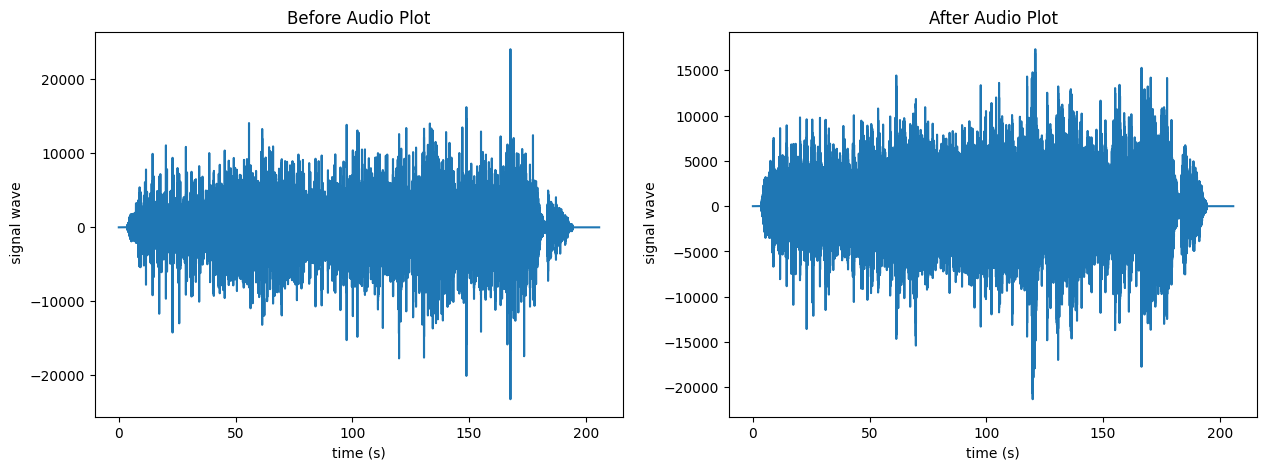

In [96]:
plt.figure(figsize=(15, 5))


# Plot 1
plt.subplot(1, 2, 1)
plt.plot(input_time, input_signal_array)
plt.title('Before Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')


# Plot 2 
plt.subplot(1, 2, 2)
plt.plot(output_time, output_signal_array)
plt.title('After Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')


plt.xlim(0, time) #limiting the x axis to the audio time
plt.show()